<a href="https://colab.research.google.com/github/nebyu08/data_sc/blob/main/tf_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-datasets

In [2]:
import tensorflow_datasets as tfds

In [3]:
mnist=tfds.load(name="mnist")

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
mnist_train,mnist_test=mnist["train"],mnist["test"]

In [6]:
type(mnist_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
mnist_train=mnist_train.shuffle(10000).batch(32).prefetch(1)

In [9]:
import matplotlib.pyplot as plt

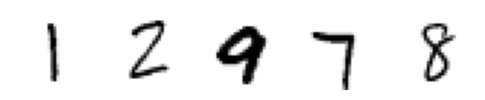

In [16]:
plt.figure(figsize=(6,3))
for item in mnist_train:
  images=item["image"]
  labels=item["label"]
  for index in range(5):
    plt.subplot(1,5,index+1)
    image=images[index]
    label=labels[index]
    plt.imshow(image,cmap="binary")
    #plt.title(label)
    plt.axis("off")
  break

In [17]:
dataset=tfds.load("mnist")
train_data,test_data=dataset["train"],dataset["test"]
train_data=train_data.repeat(5).batch(32)
train_data=train_data.map(lambda items: (items["image"],items["label"]))
train_data=train_data.prefetch(1)
for images,labels in train_data.take(1):
  print(images.shape)
  print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [18]:
len(labels)

32

In [20]:
import keras
import tensorflow as tf
import numpy as np

In [22]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
datasets=tfds.load(name="mnist",batch_size=32,as_supervised=True)
mnist_train=datasets["train"].repeat().prefetch(1)
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28,1]),
    keras.layers.Lambda(lambda images:tf.cast(images,tf.float32)),
    keras.layers.Dense(10,activation="softmax",)
])

In [25]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["accuracy"])

In [26]:
model.fit(train_data,steps_per_epoch=60000//32,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 31.8019 - accuracy: 0.8428
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 25.7564 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 24.7205 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 24.1163 - accuracy: 0.8755
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 24.1373 - accuracy: 0.8779
